## 1. Import necessary libraries

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load dataset

In [166]:
# load the dataset and display 10 rows of the DataFrame
df = pd.read_csv('train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 3. Investigate the dataset

In [167]:
# check the shape of the df
df.shape

(891, 12)

**Insights** - In this data set, there is 891 rows and 12 columns in the df. 

In [168]:
# get some basic information on the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [169]:
# find out the number of null values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Insights** - We can clearly see that 'Age', 'Cabin', and 'Embarked' columns contain null values, so we will pick them one by one and updates those columns.

## 4. Data Cleaning

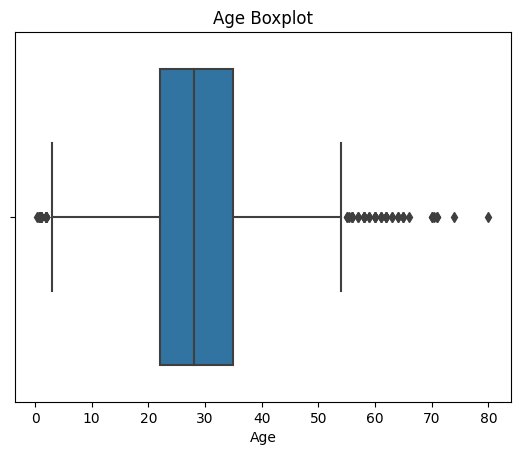

In [196]:
# checking outliers in the Age column
sns.boxplot(x=df['Age'])
plt.title("Age Boxplot")
plt.show()

In [203]:
# The Interquartile Range(IQR) method for detecting outliers
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

print(f'Lower bound age: {lower_bound_age}')
print(f'Upper bound age: {upper_bound_age}')

outliers_age = df[(df['Age'] < lower_bound_age) | (df['Age'] > upper_bound_age)]

outliers_age.head()

Lower bound age: 2.5
Upper bound age: 54.5


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,S,Child
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.550,S,Adult
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.000,S,Adult
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,Q,Child
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.500,S,Senior


In [170]:
# 1. Identify and handle missing values appropriately.
# The Titanic dataset has a wide range of ages, and there is outliers(very young or very old passengers). That's why
# median is a safer choice
df['Age'].fillna(df['Age'].median(), inplace=True)

In [171]:
# handling missing values on 'Embarked' column. Fill missing 'Embarked' with the most frequent value.
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [172]:
# drop 'Cabin' column as it has too many missing values
df.drop(columns=['Cabin'], inplace=True)

In [173]:
# after handling missing values now the DataFrame looks like
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [174]:
# 2. check for duplicates in the dataset
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


**Insights** - We can see that in this dataset there are no duplicate rows. We also can't find any date-related columns here, so the date conversion isn't applicable here.

In [175]:
# 3. create a new column for the passenger's age group ('Child', 'Adult', 'Senior') based on the 'Age' column.

def age_group(age):
    if age < 18:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

df['AgeGroup'] = df['Age'].apply(age_group)

df[['Age', 'AgeGroup']].head(10)

,Age,AgeGroup
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult
5,28.0,Adult
6,54.0,Adult
7,2.0,Child
8,27.0,Adult
9,14.0,Child


In [176]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


## 5. Exploratory Data Analysis (EDA)

In [177]:
# get discriptive statistcs on 'object' data types
df.describe(include='object')

,Name,Sex,Ticket,Embarked,AgeGroup
count,891,891,891,891,891
unique,891,2,681,3,3
top,"Braund, Mr. Owen Harris",male,347082,S,Adult
freq,1,577,7,646,752


In [178]:
# get discriptive statistcs on 'numerical' data types
df.describe(include='number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 5.1 Univariate Analysis

In [179]:
# male, female passengers number in the dataset
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

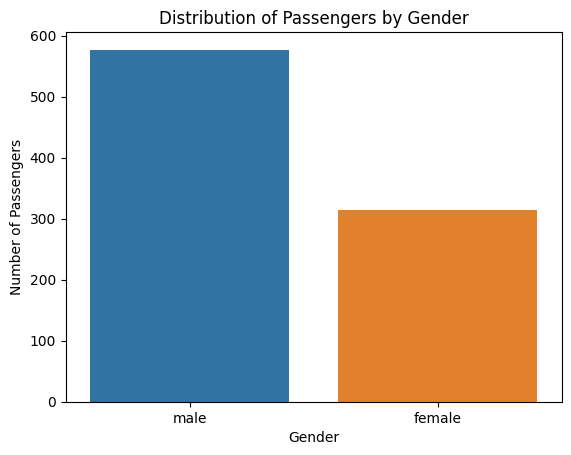

In [180]:
# visualize the distribution of passengers by gender using a bar plot
sns.countplot(x='Sex', data=df)

plt.title('Distribution of Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')

plt.show()

In [181]:
# total unique numbers of different AgeGroup
df['AgeGroup'].value_counts()

AgeGroup
Adult     752
Child     113
Senior     26
Name: count, dtype: int64

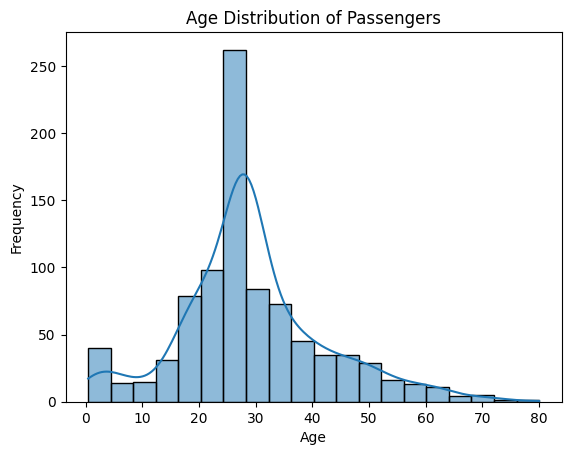

In [182]:
# create a histogram for the age distribution
sns.histplot(data=df, x='Age', bins=20, kde=True)

plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

**Insights** - From age distribution, we can see that 'Adult' passenger numbers are significantly high.

In [183]:
# number of passengers are survived
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

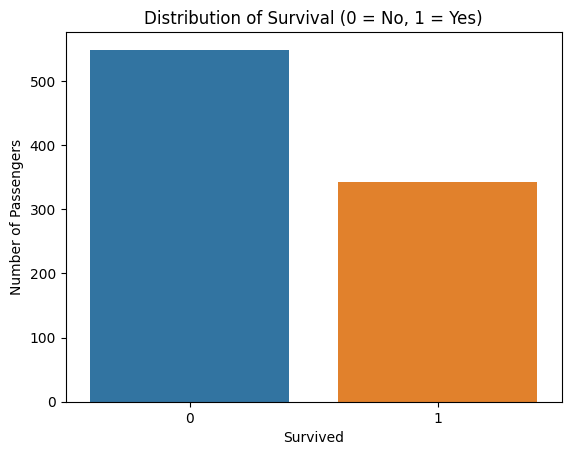

In [184]:
# distribution of survival
sns.countplot(data=df, x='Survived')

plt.title('Distribution of Survival (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.show()

In [185]:
# the total number of passengers in each passenger class is 
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

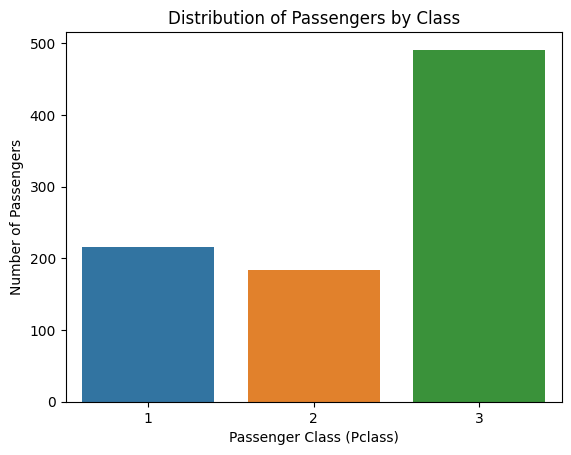

In [186]:
# distribution of passenger class (Pclass)
sns.countplot(data=df, x='Pclass')

plt.title('Distribution of Passengers by Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Number of Passengers')
plt.show()

#### Insights from Univariate Analysis
1. Male passengers nearly double female passengers.
2. Adult passengers far outnumber children and the elderly.
3. Only 342 passengers survived and 549 didn't.
4. The number of passengers in the third class was more than that of the first and second classes.

#### 5.2 Bivariate Analysis

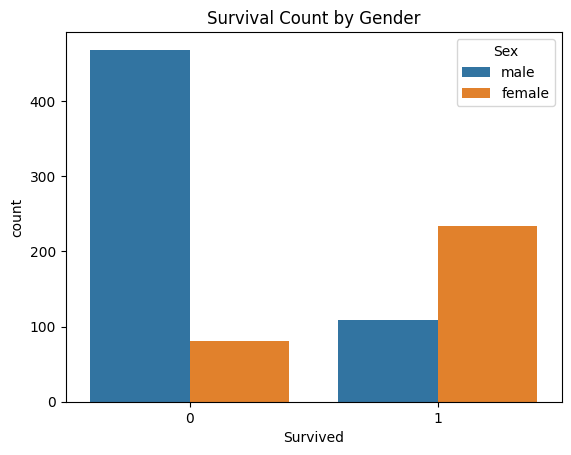

Survival Rate for female: 74.20%
Survival Rate for male: 18.89%


In [187]:
# Survival vs Sex
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Survival Count by Gender')
plt.show()

# Survival rates by gender
survival_rate = df.groupby('Sex')['Survived'].mean() * 100

for age_group, rate in survival_rate.items():
    print(f'Survival Rate for {age_group}: {rate:.2f}%')

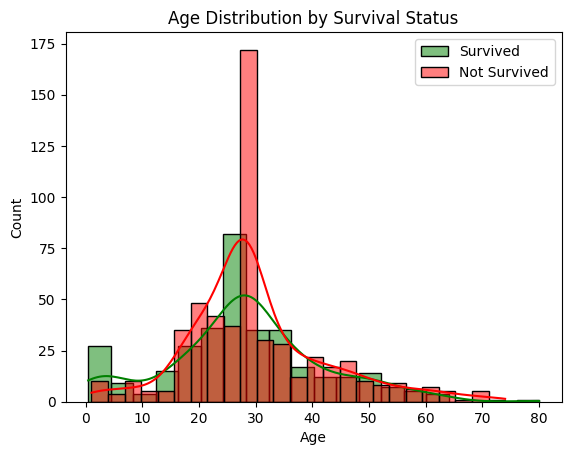

In [188]:
# Survival vs Age
sns.histplot(df[df['Survived'] == 1]['Age'], color='green', label='Survived', kde=True)
sns.histplot(df[df['Survived'] == 0]['Age'], color='red', label='Not Survived', kde=True)
plt.legend()
plt.title('Age Distribution by Survival Status')
plt.show()

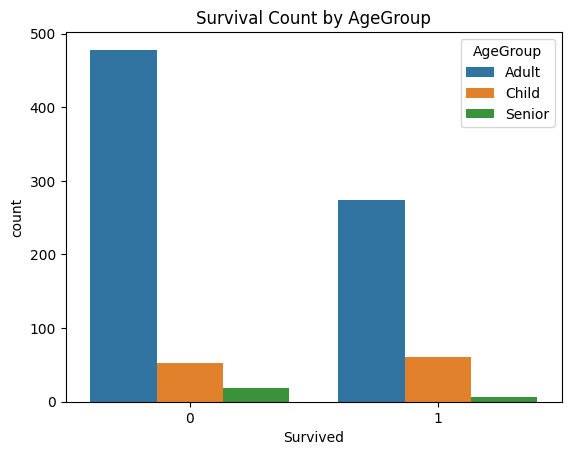

Survival Rate for Adult: 36.44%
Survival Rate for Child: 53.98%
Survival Rate for Senior: 26.92%


In [189]:
# Survival vs AgeGroup
sns.countplot(data=df, x='Survived', hue='AgeGroup')
plt.title('Survival Count by AgeGroup')
plt.show()

# Survival rates by AgeGroup
survival_rate = df.groupby('AgeGroup')['Survived'].mean() * 100

for age_group, rate in survival_rate.items():
    print(f'Survival Rate for {age_group}: {rate:.2f}%')

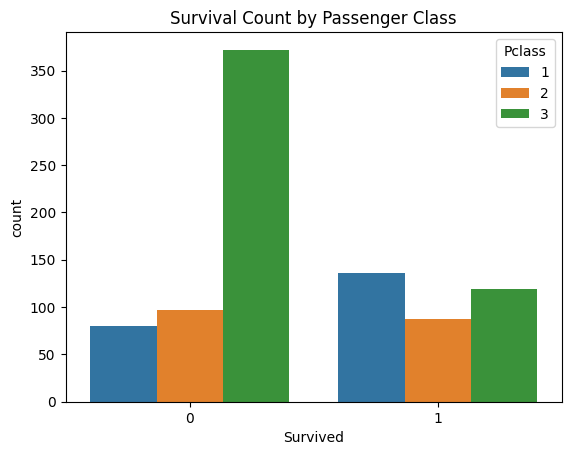

Survival Rate for class 1: 62.96%
Survival Rate for class 2: 47.28%
Survival Rate for class 3: 24.24%


In [190]:
# Survival vs Pclass
sns.countplot(data=df, x='Survived', hue='Pclass')
plt.title('Survival Count by Passenger Class')
plt.show()

# Survival rates by Pclass
survival_rate = df.groupby('Pclass')['Survived'].mean() * 100

for age_group, rate in survival_rate.items():
    print(f'Survival Rate for class {age_group}: {rate:.2f}%')

#### 5.3 Multivariate Analysis

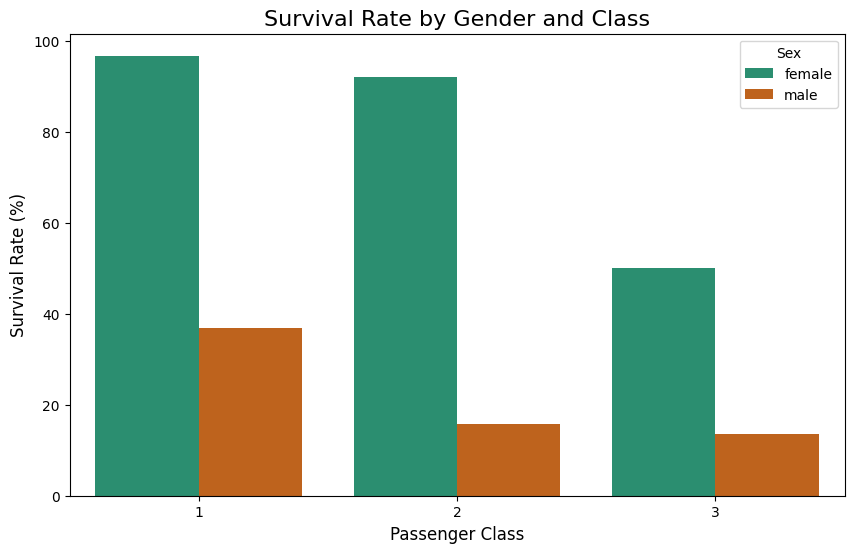

In [191]:
# Survival rate by Gender and Class

survival_rate = df.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()
survival_rate['Survived'] *= 100

plt.figure(figsize=(10, 6))
sns.barplot(data=survival_rate, x='Pclass', y='Survived', hue='Sex', palette='Dark2')

plt.title('Survival Rate by Gender and Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)

plt.show()

In [192]:
survival_rate = df.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100

# Display survival rate for each group
for (gender, pclass), rate in survival_rate.items():
    print(f'Survival Rate for {gender} in Class {pclass}: {rate:.2f}%')

Survival Rate for female in Class 1: 96.81%
Survival Rate for female in Class 2: 92.11%
Survival Rate for female in Class 3: 50.00%
Survival Rate for male in Class 1: 36.89%
Survival Rate for male in Class 2: 15.74%
Survival Rate for male in Class 3: 13.54%


          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.064910 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.339898  0.083081  0.018443 -0.549500
Age      -0.064910 -0.339898  1.000000 -0.233296 -0.172482  0.096688
SibSp    -0.035322  0.083081 -0.233296  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.172482  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096688  0.159651  0.216225  1.000000


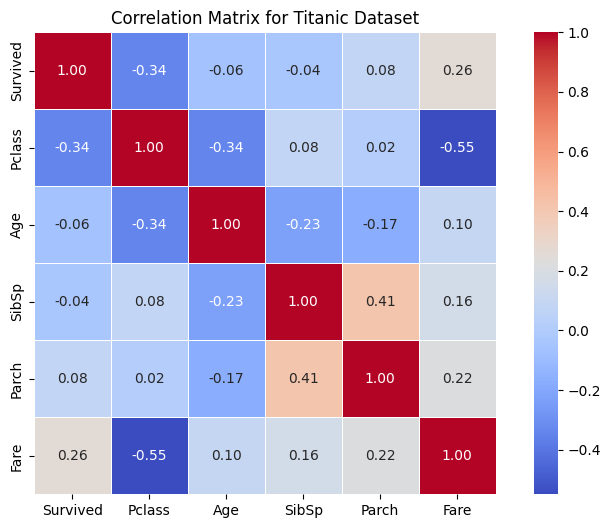

In [193]:
# Calculate correlation matrix in the Titanic dataset. The relevant numerical columns are 
correlation_matrix = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)

plt.title('Correlation Matrix for Titanic Dataset')
plt.show()

#### Interpretation of Correlation Matrix
* Survived and Pclass: has a negative correlation(-0.34), indicating that the passenger class increases(from 3 to 1), the likelihood of survival increases
* Survived and Age: generally has a weak negative correlation(-0.06), suggesting that Senior passengers had a lower survival rate.

## 6. Basic Statistical Analysis

In [194]:
# Calculate the mean, median, and mode for the 'Fare' and 'Age' columns
# for Age
mean_age = round(df['Age'].mean(), 2)
median_age = round(df['Age'].median(), 2)
mode_age = df['Age'].mode()[0]
print(f'Mean age: {mean_age}')
print(f'Median age: {median_age}')
print(f'Mode age: {mode_age}\n')

# for Fare
mean_fare = round(df['Fare'].mean(), 2)
median_fare = round(df['Fare'].median(), 2)
mode_fare = df['Fare'].mode()[0]
print(f'Mean fare: {mean_fare}')
print(f'Median fare: {median_fare}')
print(f'Mode fare: {mode_fare}')

Mean age: 29.36
Median age: 28.0
Mode age: 28.0

Mean fare: 32.2
Median fare: 14.45
Mode fare: 8.05


In [195]:
# Perform a t-test to determine if there's a significant difference in survival rate based on gender
from scipy.stats import ttest_ind

# Separate the data by gender
male_survival = df[df['Sex'] == 'male']['Survived']
female_survival = df[df['Sex'] == 'female']['Survived']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(male_survival, female_survival, nan_policy='omit')

# Print the results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.5f}")

# Interpretation based on p-value
alpha = 0.05  # 95% confidence level

if p_value < alpha:
    print("There is a significant difference in survival rates based on gender.")
else:
    print("There is no significant difference in survival rates based on gender.")


T-statistic: -19.30
P-value: 0.00000
There is a significant difference in survival rates based on gender.
